In [ ]:
# PROCESAMIENTO DE DATOS 

* * * 

### Iconos utilizados en este cuaderno
🔔 **Pregunta**: Una pregunta rápida para ayudarte a entender lo que está pasando.<br>
🥊 **Desafío**: Extraer la Data del sitio Web (web-scraping) para su análisis!<br>
⚠️ **Advertencia**: Aviso sobre cosas complicadas o errores comunes.<br>
💡 **Consejo**: Cómo hacer algo de manera más eficiente o efectiva.<br>
🎬 **Demostración**: Mostrar algo más avanzado, Creamos la Base de Datos y Graficamos.<br>

<a id='when'></a>

# Es seguro extraer la Data de un sitio WEB

Cuando queremos acceder a datos de la web, primero debemos asegurarnos que el sitio web que nos interesa ofresca una API web. Plataformas como Twitter, Reddit, el New York Times y ciertas páginas gubernamentales ofrecen APIs. 

Sin embargo, a menudo hay casos en los que no existe una API web. En estos casos, podemos recurrir al web scraping, donde extraemos el HTML de una página web y obtenemos directamente la información que queremos. 

Nuestra data es extraída de el repositorio [senadores estatales de Illinois](http://www.ilga.gov/senate) ya que este sitio ofrece un sinúmeo de repositorios con los que podemos trabajar es asi que la investigación nos llevó a detectar que existen repositorios desde la **93ava hasta la 104ava asamblea**, sitio del cual escogimos la [lista de senadores que laboran desde casa](https://www.ilga.gov/house/default.asp?GA=104) **104ava** que es diferente a la ya estudiada pero su estructura es similar.




## El desafío comienza con la adecuación del Escenario

Usaremos dos paquetes principales: **Requests, Beautiful Soup, Psycopg2, Matplotlib.pyplot, Seaborn, Numpy y Pandas**


In [ ]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


También instalaremos el paquete `lxml` que ayuda a soportar parte del análisis que realiza Beautiful Soup:

In [ ]:
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


Importamos las Librerías que vamos a necesitar

In [ ]:
# Import required libraries
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import time

<a id='extract'></a>

# Extracción y Análisis de HTML 

Para realizar correctamente la extracción y el análisis de HTML, seguiremos los siguientes 4 pasos:
1. Realizar una solicitud GET
2. Analizar la página con Beautiful Soup
3. Buscar elementos HTML
4. Obtener atributos y texto de estos elementos

## Paso 1: Solicitud GET

Podemos usar la biblioteca Requests para:

1. Hacer una solicitud GET a la página, y  
2. Leer el código HTML de la página web.

El proceso de realizar una solicitud y obtener un resultado se asemeja al flujo de trabajo de una API web. Sin embargo, en este caso, estamos haciendo una solicitud directamente al sitio web, y tendremos que analizar el HTML por nuestra cuenta. Esto contrasta con recibir datos organizados en un formato más sencillo como `JSON` o `XML`.


In [ ]:
# Make a GET request
req = requests.get('https://www.ilga.gov/house/default.asp')
# Read the content of the server’s response
src = req.text
# Parse the response into an HTML tree
soup = BeautifulSoup(src, 'lxml')

## Paso 2: Analizar la Página con Beautiful Soup

Ahora utilizamos la función `BeautifulSoup` para analizar la respuesta y convertirla en un árbol HTML. Esto devuelve un objeto (llamado **soup object**) que contiene todo el HTML del documento original.

In [ ]:
# Parse the response into an HTML tree
soup = BeautifulSoup(src, 'lxml')
# Take a look
print(soup.prettify()[:1000])

<html lang="en">
 <!-- Trigger/Open The Modal -->
 <body>
  <div style="position: fixed; z-index: 999; top: 5; left: 600; background-color: navy; display: block">
   <button id="myBtn" style="color: white; background-color: navy; display: block">
    Translate Website
   </button>
  </div>
  <!-- The Modal -->
  <div class="modal" id="myModal" style="display: none">
   <!-- Modal content -->
   <div class="modal-content">
    <div class="modal-header">
     <h3>
      <span class="close">
       ×
      </span>
     </h3>
    </div>
    <p>
     The Illinois General Assembly offers the Google Translate service for visitor convenience. In no way should it be considered accurate as to the translation of any content herein.
    </p>
    <p>
     Visitors of the Illinois General Assembly website are encouraged to use other translation services available on the internet.
    </p>
    <p>
     The English language version is always the official and authoritative version of this website.
   

La salida se ve bastante similar a la anterior, pero ahora está organizada en un objeto `soup`, lo que nos permite recorrer la página con mayor facilidad.


## Paso 3: Buscar Elementos HTML

Beautiful Soup ofrece varias funciones para encontrar componentes útiles en una página. Permite buscar elementos utilizando:

1. Etiquetas HTML  
2. Atributos HTML  
3. Selectores CSS  

Primero, busquemos **etiquetas HTML**.  

La función `find_all` busca en el árbol de `soup` todos los elementos con una etiqueta HTML específica y devuelve todos esos elementos.


In [ ]:
# Find all elements with a certain tag
a_tags = soup.find_all("a")
print(a_tags[:10])

[<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>, <a href="/default.asp"><img alt="Illinois General Assembly" border="0" height="49" src="/images/logo_sm.gif" width="462"/></a>, <a class="mainmenu" href="/">Home</a>, <a class="mainmenu" href="/legislation/" onblur="HM_f_PopDown('elMenu1')" onfocus="HM_f_PopUp('elMenu1',event)" onmouseout="HM_f_PopDown('elMenu1')" onmouseover="HM_f_PopUp('elMenu1',event)">Legislation &amp; Laws</a>, <a class="mainmenu" href="/senate/" onblur="HM_f_PopDown('elMenu3')" onfocus="HM_f_PopUp('elMenu3',event)" onmouseout="HM_f_PopDown('elMenu3')" onmouseover="HM_f_PopUp('elMenu3',event)">Senate</a>, <a class="mainmenu" href="/house/" onblur="HM_f_PopDown('elMenu2')" onfocus="HM_f_PopUp('elMenu2',event)" onmouseout="HM_f_PopDown('elMenu2')" onmouseove

Dado que `find_all()` es el método más popular en la API de búsqueda de Beautiful Soup, existe un atajo para usarlo.

Si tratas al objeto `BeautifulSoup` como si fuera una función, es equivalente a llamar a `find_all()` en ese objeto.

In [ ]:
a_tags = soup.find_all("a")
a_tags_alt = soup("a")
print(a_tags[0])
print(a_tags_alt[0])

<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>
<a class="goog-logo-link" href="https://translate.google.com" target="_blank"><img alt="Google Translate" height="14" src="https://www.gstatic.com/images/branding/googlelogo/1x/googlelogo_color_42x16dp.png" style="padding-right: 3px;" width="37"/>Translate</a>


¿Cuántos enlaces obtuvimos?

In [ ]:
print(len(a_tags))

382


¡Eso es mucho! Muchos elementos en una página tendrán la misma etiqueta HTML, estamos encontrando todas las etiquetas `a` y luego filtrando aquellas con `class_="sidemenu"`:

In [ ]:
# Get only the 'a' tags in 'sidemenu' class
side_menus = soup("a", class_="sidemenu")
side_menus[:5]

[<a class="sidemenu" href="/house/default.asp">  Members  </a>,
 <a class="sidemenu" href="/house/committees/default.asp">  Committees  </a>,
 <a class="sidemenu" href="/house/schedules/default.asp">  Schedules  </a>,
 <a class="sidemenu" href="/house/journals/default.asp">  Journals  </a>,
 <a class="sidemenu" href="/house/transcripts/default.asp">  Transcripts  </a>]

Podemos usar `"a.sidemenu"` como selector CSS, lo que devuelve todas las etiquetas `a` con la clase `sidemenu`.



In [ ]:
# Get elements with "a.sidemenu" CSS Selector.
selected = soup.select("a.sidemenu")
selected[:5]

[<a class="sidemenu" href="/house/default.asp">  Members  </a>,
 <a class="sidemenu" href="/house/committees/default.asp">  Committees  </a>,
 <a class="sidemenu" href="/house/schedules/default.asp">  Schedules  </a>,
 <a class="sidemenu" href="/house/journals/default.asp">  Journals  </a>,
 <a class="sidemenu" href="/house/transcripts/default.asp">  Transcripts  </a>]

## 🥊 Desafío: Encontrar Todos los Elementos de la Data

Usamos BeautifulSoup para encontrar todos los elementos `a` con la clase `mainmenu`.

In [ ]:
# YOUR CODE HERE
soup.select("a.mainmenu")

[<a class="mainmenu" href="/">Home</a>,
 <a class="mainmenu" href="/legislation/" onblur="HM_f_PopDown('elMenu1')" onfocus="HM_f_PopUp('elMenu1',event)" onmouseout="HM_f_PopDown('elMenu1')" onmouseover="HM_f_PopUp('elMenu1',event)">Legislation &amp; Laws</a>,
 <a class="mainmenu" href="/senate/" onblur="HM_f_PopDown('elMenu3')" onfocus="HM_f_PopUp('elMenu3',event)" onmouseout="HM_f_PopDown('elMenu3')" onmouseover="HM_f_PopUp('elMenu3',event)">Senate</a>,
 <a class="mainmenu" href="/house/" onblur="HM_f_PopDown('elMenu2')" onfocus="HM_f_PopUp('elMenu2',event)" onmouseout="HM_f_PopDown('elMenu2')" onmouseover="HM_f_PopUp('elMenu2',event)">House</a>,
 <a class="mainmenu" href="/mylegislation/" onblur="HM_f_PopDown('elMenu4')" onfocus="HM_f_PopUp('elMenu4',event)" onmouseout="HM_f_PopDown('elMenu4')" onmouseover="HM_f_PopUp('elMenu4',event)">My Legislation</a>,
 <a class="mainmenu" href="/sitemap.asp">Site Map</a>]

## Paso 4: Se obtiene los Atributos y Texto

Una vez que identificamos los elementos, queremos acceder a la información dentro de ellos. Generalmente, esto significa dos cosas: **Texto , Atributos**  

Para obtener todo lo que tenemos que hacer es usar el miembro `text` de un objeto `tag`:

In [ ]:
# Get all sidemenu links as a list
side_menu_links = soup.select("a.sidemenu")

# Examine the first link
first_link = side_menu_links[0]
print(first_link)

# What class is this variable?
print('Class: ', type(first_link))

<a class="sidemenu" href="/house/default.asp">  Members  </a>
Class:  <class 'bs4.element.Tag'>


¡Es una etiqueta de Beautiful Soup! Esto significa que tiene un miembro `text`:

In [ ]:
print(first_link.text)

  Members  


A veces queremos obtener el valor de ciertos atributos. Esto es particularmente relevante para las etiquetas `a`, o enlaces, donde el atributo `href` nos indica a dónde lleva el enlace.

In [ ]:
print(first_link['href'])

/house/default.asp


Verificamos La cantidad de Senadores por partido

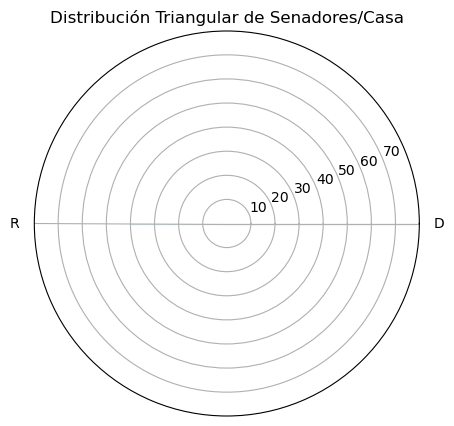

In [ ]:
# Conectar a PostgreSQL y obtener los datos
def get_data_from_db():
    conn = psycopg2.connect(
        database="senadores_house_logs",
        user="postgres",
        password="postgres",
        host="localhost",
        port="5432"
    )
    cursor = conn.cursor()
    
    # Obtener distribución de senadores/casa por partido
    cursor.execute("SELECT party, COUNT(*) FROM structured_logs GROUP BY party;")
    party_data = cursor.fetchall()
    
    # Obtener distribución de senadores/casa por distrito
    cursor.execute("SELECT distrit, COUNT(*) FROM structured_logs GROUP BY distrit;")
    district_data = cursor.fetchall()
    
    conn.close()
    return party_data, district_data

# Graficar distribución triangular
def plot_triangular_chart(party_data):
    labels, sizes = zip(*party_data)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    sizes += sizes[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
    ax.fill(angles, sizes, color='lightblue', alpha=0.6)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title("Distribución Triangular de Senadores/Casa")
    plt.show()

if __name__ == "__main__":
    party_data, district_data = get_data_from_db()
    plot_triangular_chart(party_data)